## Exercício de Regressão Múltipla

### Importações

In [1]:
# Bibliotecas
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Base de Dados
ds = pd.read_csv('../../Distribuições_Estatisticas/house_prices.csv')
ds = ds.drop(['id', 'date', 'sqft_living15', 'sqft_lot15'], axis = 1)
ds.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [3]:
# Informação 
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
dtypes: float64(5), int64(12)
memory usage: 2.8 MB


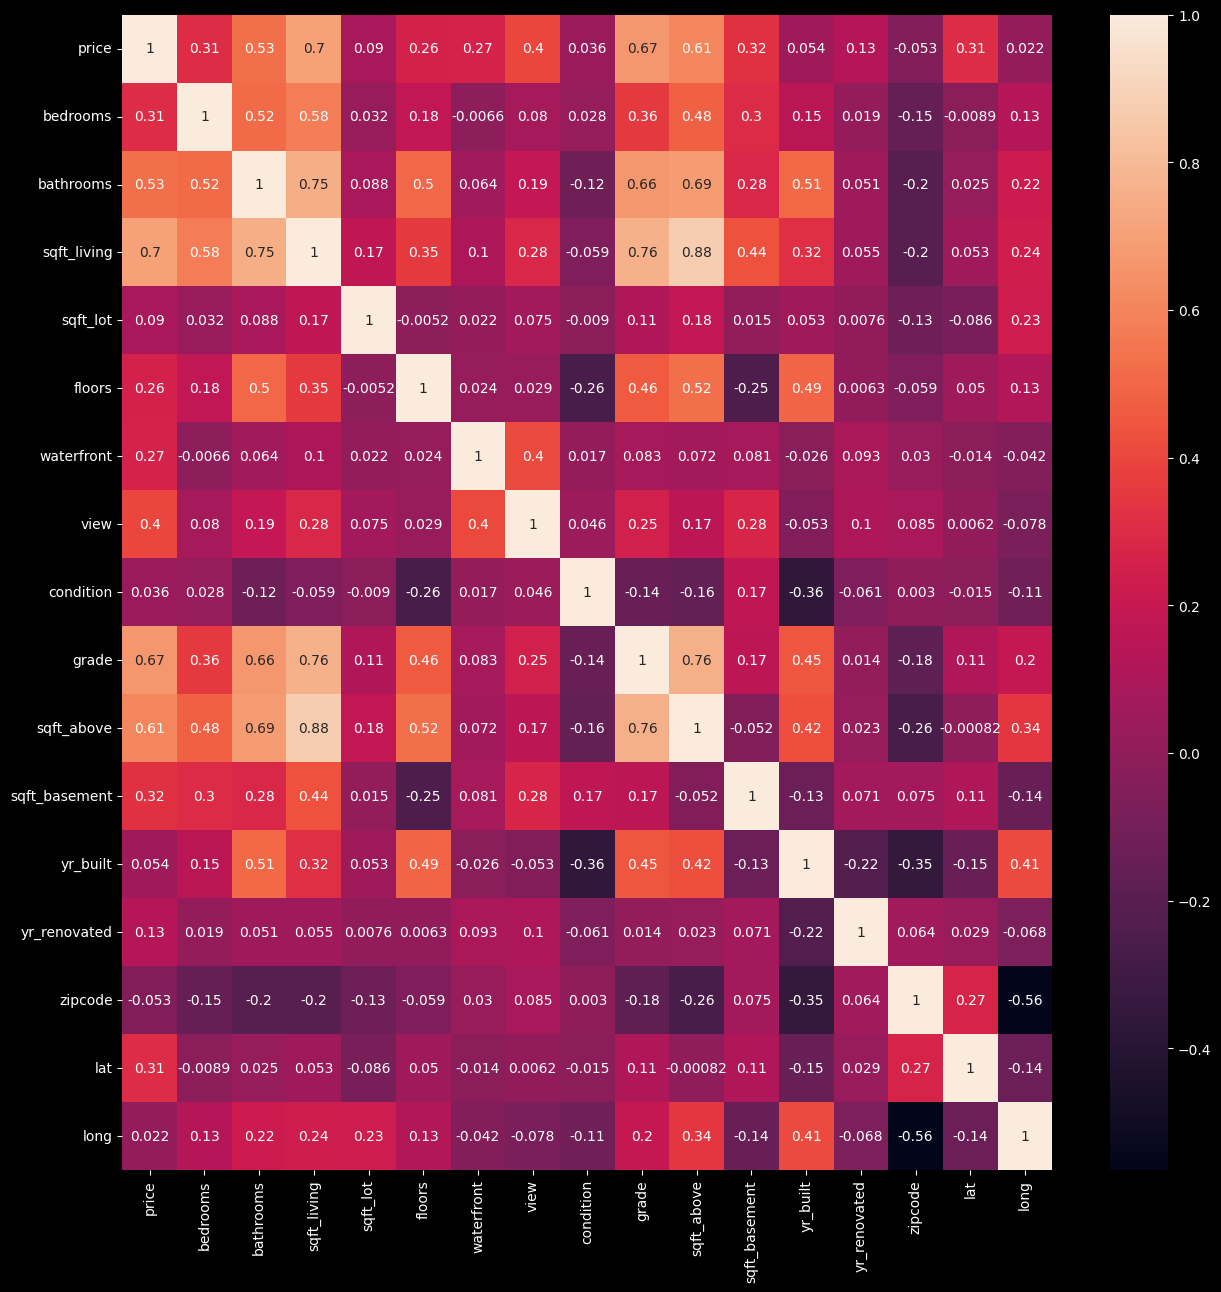

In [4]:
# Gráfico de correlação
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(ds.corr(numeric_only=True), annot=True)

In [5]:
# Separando as variáveis 
X = ds.iloc[:, 1:17].values
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [6]:
# Separando a classe
y = ds.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [7]:
# logarítmico de y para transformar em uma distribuição normal
y = np.log(y)

In [8]:
# Dividindo entre treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)
X_treinamento.shape, X_teste.shape

((17290, 16), (4323, 16))

In [9]:
# Treinado o modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [10]:
# Score do treinamento
regressor.score(X_treinamento, y_treinamento)

0.7646729957010284

In [11]:
# Score do teste
regressor.score(X_teste, y_teste)

0.7651215668683928

In [12]:
# A variável de previsões e diferença de erro
previsoes = regressor.predict(X_teste)
mean_absolute_error(y_teste, previsoes)

0.19756355594358102